## Student Name : Rakesh Paul

## Student ID : 22271872

## Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./bank.csv")

In [3]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [4]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

Check for missing values.

In [5]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Before we start transforming the dataset let's make a copy of it.

In [6]:
df_original = df.copy(deep=True)

## Process and Encode the Categorical Features

Following categorical attribute is **ordinal** 
- education

Follwing categorical attribute is **cyclic**
- month (because the beginning and end feature are close to each other)

All other categorical attributes are **nominal**.

### Encode Ordinal Categorical Attributes 

#### education
Let us see what unique value it contain.

In [7]:
#### Show unique values of `education`
df['education'].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

As it shows, the attribute contains NaN or missing values. Therefore, this attribute can be encoded in 2 ways:
- label encoding :  Assign numerical label to each category in the education feature. This method is useful when the categories are ordinal, and there is a natural ordering between them.
- One-hot encoding : Create binary variable for each category in the education feature.

I decided to go with label encoding because it preserves the ordinal relationship between the categories and also help improving the performance of machine learning algorithms.

In [8]:
# Fill NaN entries (missing value) with "missing" string
df['education'].fillna('missing', inplace = True) 

In [9]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single    missing      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [10]:
# Create a education mapper with following label encoding

scale_mapper_education = {
    "missing" : 0,
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

df['education'] = df['education'].replace(scale_mapper_education)

### Encode cyclic categorical attribute

In [11]:
# Create a month mapper with following label encoding

scale_mapper_month = {
    "jan" : 1,
    "feb" : 2,
    "mar" : 3,
    "apr" : 4,
    "may" : 5,
    "jun" : 6,
    "jul" : 7,
    "aug" : 8,
    "sep" : 9,
    "oct" : 10,
    "nov" : 11,
    "dec" : 12
}

df['month'] = df['month'].replace(scale_mapper_month)

In [12]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single          0      no     2785      no   no   
1996  28.0        admin.   single          2      no      127      no   no   
1997  81.0       retired  married          1      no     1154      no   no   
1998  46.0      services  married          1      no     4343     yes   no   
1999  40.0  entrepreneur  married          2      no     6403      no   no   

        contact  day  month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16      9       327         2     -1         0      NaN   
1996   cellular   16      9      1334         2     -1         0      NaN   
1997  telephone   17      9       231         1     -1         0      NaN   
1998        NaN   20      9       185         1     -1         0      NaN   
1999   cellular   22      9       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [13]:
# Apply sine and cosine encoding to convert `month` attribute
df['month_sin'] = np.sin((2 * np.pi * df['month']) / max(df['month']))
df['month_cos'] = np.cos((2 * np.pi * df['month']) / max(df['month']))

# Drop the original `month` attribute
df.drop('month', axis=1, inplace=True)

In [14]:
print(df['month_sin'].unique())

[ 8.66025404e-01 -2.44929360e-16  8.66025404e-01  5.00000000e-01
  1.00000000e+00 -5.00000000e-01 -8.66025404e-01 -8.66025404e-01
 -5.00000000e-01  1.22464680e-16 -1.00000000e+00]


In [15]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single          0      no     2785      no   no   
1996  28.0        admin.   single          2      no      127      no   no   
1997  81.0       retired  married          1      no     1154      no   no   
1998  46.0      services  married          1      no     4343     yes   no   
1999  40.0  entrepreneur  married          2      no     6403      no   no   

        contact  day  duration  campaign  pdays  previous poutcome subscribed  \
1995   cellular   16       327         2     -1         0      NaN        yes   
1996   cellular   16      1334         2     -1         0      NaN        yes   
1997  telephone   17       231         1     -1         0      NaN        yes   
1998        NaN   20       185         1     -1         0      NaN        yes   
1999   cellular   22       208         2     -1         0      NaN        yes   

      month_sin     month_cos  
1995       -1.0 -1.836970e-16  
1996       -1.0 -1.836970e-16  
1997       -1.0 -1.836970e-16  
1998       -1.0 -1.836970e-16  
1999       -1.0 -1.836970e-16

### Encode All Other Categorical Attributes
####  One-Hot encoding
We can apply One-hot encoding to all other categorical attributes as there is no natural ordering among the value categories of each of the attributes. It creates binary variable for each value category, allowing the machine learning algorithm to treat each category with equal importance and in turn no relationship is deduced by the algorithm where there is none.

In [16]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

age  marital  education default  balance housing loan  day  duration  \
1995  20.0   single          0      no     2785      no   no   16       327   
1996  28.0   single          2      no      127      no   no   16      1334   
1997  81.0  married          1      no     1154      no   no   17       231   
1998  46.0  married          1      no     4343     yes   no   20       185   
1999  40.0  married          2      no     6403      no   no   22       208   

      campaign  ...  job_services  job_student job_technician  job_unemployed  \
1995         2  ...             0            1              0               0   
1996         2  ...             0            0              0               0   
1997         1  ...             0            0              0               0   
1998         1  ...             1            0              0               0   
1999         2  ...             0            0              0               0   

      job_nan  contact_telephone  contact_nan  poutcome_other  \
1995        0                  0            0               0   
1996        0                  0            0               0   
1997        0                  1            0               0   
1998        0                  0            1               0   
1999        0                  0            0               0   

      poutcome_success  poutcome_nan  
1995                 0             1  
1996                 0             1  
1997                 0             1  
1998                 0             1  
1999                 0             1  

[5 rows x 31 columns]

In [17]:
# now one-hot encode all other categorical columns
pd.set_option("display.max_columns", None)
df = pd.get_dummies(df, drop_first=True)
df.tail()

age  education  balance  day  duration  campaign  pdays  previous  \
1995  20.0          0     2785   16       327         2     -1         0   
1996  28.0          2      127   16      1334         2     -1         0   
1997  81.0          1     1154   17       231         1     -1         0   
1998  46.0          1     4343   20       185         1     -1         0   
1999  40.0          2     6403   22       208         2     -1         0   

      month_sin     month_cos  job_blue-collar  job_entrepreneur  \
1995       -1.0 -1.836970e-16                0                 0   
1996       -1.0 -1.836970e-16                0                 0   
1997       -1.0 -1.836970e-16                0                 0   
1998       -1.0 -1.836970e-16                0                 0   
1999       -1.0 -1.836970e-16                0                 1   

      job_housemaid  job_management  job_retired  job_self-employed  \
1995              0               0            0                  0   
1996              0               0            0                  0   
1997              0               0            1                  0   
1998              0               0            0                  0   
1999              0               0            0                  0   

      job_services  job_student  job_technician  job_unemployed  job_nan  \
1995             0            1               0               0        0   
1996             0            0               0               0        0   
1997             0            0               0               0        0   
1998             1            0               0               0        0   
1999             0            0               0               0        0   

      contact_telephone  contact_nan  poutcome_other  poutcome_success  \
1995                  0            0               0                 0   
1996                  0            0               0                 0   
1997                  1            0               0                 0   
1998                  0            1               0                 0   
1999                  0            0               0                 0   

      poutcome_nan  marital_married  marital_single  default_yes  housing_yes  \
1995             1                0               1            0            0   
1996             1                0               1            0            0   
1997             1                1               0            0            0   
1998             1                1               0            0            1   
1999             1                1               0            0            0   

      loan_yes  subscribed_yes  
1995         0               1  
1996         0               1  
1997         0               1  
1998         0               1  
1999         0               1

## Treatment of Missing Values in Numerical Columns

### Check for Missing Values

It is often useful to impute missing values as many ML algorithms do not work with missing data and even if they do, imputing these values often helps to build a more accurate predictive model.

In [18]:
# Find the number of nulls/NaNs in the dataset
df.isna().sum()

age                  12
education             0
balance               0
day                   0
duration              0
campaign              0
pdays                 0
previous              0
month_sin             0
month_cos             0
job_blue-collar       0
job_entrepreneur      0
job_housemaid         0
job_management        0
job_retired           0
job_self-employed     0
job_services          0
job_student           0
job_technician        0
job_unemployed        0
job_nan               0
contact_telephone     0
contact_nan           0
poutcome_other        0
poutcome_success      0
poutcome_nan          0
marital_married       0
marital_single        0
default_yes           0
housing_yes           0
loan_yes              0
subscribed_yes        0
dtype: int64

In [19]:
print("Invalid values in pdays:", any(df.pdays == -1))

print("Invalid values in campaign:", any(df.campaign < 0))

print("Invalid values in duration:", any(df.duration < 0))

print("Invalid values in previous:", any(df.previous < 0))

Invalid values in pdays: True
Invalid values in campaign: False
Invalid values in duration: False
Invalid values in previous: False


- `age` attribute contains missing value.
- `pdays` attribute does not contain NaN, but it contains -1 value. As `pdays` stands for "number of days that passed by after the client was last contacted from a previous campaign ", it means -1 represent "never contacted". So, we also need to handle these values.

### Handle missing value: `age`

In [20]:
# Lets find the range of values for `age` attribute.
print(df["age"].describe()[["min", "max"]])

min    18.0
max    93.0
Name: age, dtype: float64


We do not need to consider dropping whole column of `age`. Reason being, only 1.2% value are missing. 

#### Impute Missing Values

Following are the options we can use for filling missing data for `age` attribute:
- median (useful when data is skewed)
- mean (useful when data is not heavily skewed)
- find attributes which may provide estimation of age and use the median age of these attributes for filling missing data. 

In [21]:
print(df.corr()['age'])

age                  1.000000
education           -0.213324
balance              0.139874
day                  0.042411
duration             0.076732
campaign            -0.002876
pdays                0.009121
previous             0.063805
month_sin           -0.043632
month_cos            0.012381
job_blue-collar     -0.065849
job_entrepreneur     0.023691
job_housemaid        0.058523
job_management      -0.066944
job_retired          0.590310
job_self-employed   -0.029333
job_services        -0.084439
job_student         -0.283157
job_technician      -0.052742
job_unemployed      -0.034988
job_nan              0.038270
contact_telephone    0.242210
contact_nan         -0.084375
poutcome_other      -0.028060
poutcome_success     0.126000
poutcome_nan        -0.101822
marital_married      0.360775
marital_single      -0.502627
default_yes         -0.009241
housing_yes         -0.112506
loan_yes            -0.007030
subscribed_yes       0.085983
Name: age, dtype: float64


#### Observation
 We can see from histogram that the `age` attribute is right skewed. Therefore, median is a good choice for filling missing values. But I also checked which attributes are strongly correlated to age. `job_retired`, `marital_single` seems to have strong correlation. Let check their box plot to see if any trend exist:

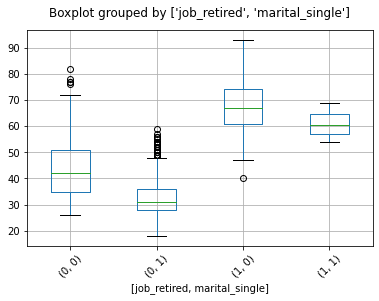

In [22]:
df.boxplot(column='age', by=['job_retired', 'marital_single'], rot=45)
plt.title("")
plt.show()

We can see some variation in the median of `age` for each group and these medians can be used for imputing the missing values in each group. Next, we create a pivot table, which contains the median values for all four groups.

In [23]:
ptable = df.pivot_table(values='age', 
                        index='job_retired',
                        columns='marital_single',  
                        aggfunc=np.median)
ptable

marital_single     0     1
job_retired               
0               42.0  31.0
1               67.0  60.5

Finally, we define a function, which returns the values in the pivot table and apply it to fill the missing values of `age`.

In [24]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['job_retired'], x['marital_single']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

<AxesSubplot:>

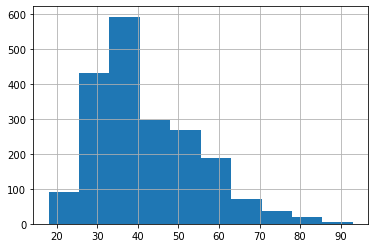

In [25]:
# plot a histogram of the 'age' attribute replacing NaN
df['age'].hist(bins=10)

In [26]:
df.tail()

age  education  balance  day  duration  campaign  pdays  previous  \
1995  20.0          0     2785   16       327         2     -1         0   
1996  28.0          2      127   16      1334         2     -1         0   
1997  81.0          1     1154   17       231         1     -1         0   
1998  46.0          1     4343   20       185         1     -1         0   
1999  40.0          2     6403   22       208         2     -1         0   

      month_sin     month_cos  job_blue-collar  job_entrepreneur  \
1995       -1.0 -1.836970e-16                0                 0   
1996       -1.0 -1.836970e-16                0                 0   
1997       -1.0 -1.836970e-16                0                 0   
1998       -1.0 -1.836970e-16                0                 0   
1999       -1.0 -1.836970e-16                0                 1   

      job_housemaid  job_management  job_retired  job_self-employed  \
1995              0               0            0                  0   
1996              0               0            0                  0   
1997              0               0            1                  0   
1998              0               0            0                  0   
1999              0               0            0                  0   

      job_services  job_student  job_technician  job_unemployed  job_nan  \
1995             0            1               0               0        0   
1996             0            0               0               0        0   
1997             0            0               0               0        0   
1998             1            0               0               0        0   
1999             0            0               0               0        0   

      contact_telephone  contact_nan  poutcome_other  poutcome_success  \
1995                  0            0               0                 0   
1996                  0            0               0                 0   
1997                  1            0               0                 0   
1998                  0            1               0                 0   
1999                  0            0               0                 0   

      poutcome_nan  marital_married  marital_single  default_yes  housing_yes  \
1995             1                0               1            0            0   
1996             1                0               1            0            0   
1997             1                1               0            0            0   
1998             1                1               0            0            1   
1999             1                1               0            0            0   

      loan_yes  subscribed_yes  
1995         0               1  
1996         0               1  
1997         0               1  
1998         0               1  
1999         0               1

### Handle missing value : `pdays`

In [27]:
# Find the percentage of -1 
print("percentage of -1 values in pdays column: ", 100 * (len(df[df['pdays'] == -1])/len(df)))

percentage of -1 values in pdays column:  22.7


We do not need to consider dropping whole column of age. Reason being, less than 25% value are missing. We can replace -1 values with median which can preserve the distribution of data while avoiding introduction of outliers (if replaced with very high value instead of median).

In [28]:
# find -1 and replace with NaN
df['pdays'] = df['pdays'].replace(-1, np.nan)

# replace NaN with median
df['pdays'] = df['pdays'].fillna(df['pdays'].median())

df.tail()

age  education  balance  day  duration  campaign  pdays  previous  \
1995  20.0          0     2785   16       327         2  199.0         0   
1996  28.0          2      127   16      1334         2  199.0         0   
1997  81.0          1     1154   17       231         1  199.0         0   
1998  46.0          1     4343   20       185         1  199.0         0   
1999  40.0          2     6403   22       208         2  199.0         0   

      month_sin     month_cos  job_blue-collar  job_entrepreneur  \
1995       -1.0 -1.836970e-16                0                 0   
1996       -1.0 -1.836970e-16                0                 0   
1997       -1.0 -1.836970e-16                0                 0   
1998       -1.0 -1.836970e-16                0                 0   
1999       -1.0 -1.836970e-16                0                 1   

      job_housemaid  job_management  job_retired  job_self-employed  \
1995              0               0            0                  0   
1996              0               0            0                  0   
1997              0               0            1                  0   
1998              0               0            0                  0   
1999              0               0            0                  0   

      job_services  job_student  job_technician  job_unemployed  job_nan  \
1995             0            1               0               0        0   
1996             0            0               0               0        0   
1997             0            0               0               0        0   
1998             1            0               0               0        0   
1999             0            0               0               0        0   

      contact_telephone  contact_nan  poutcome_other  poutcome_success  \
1995                  0            0               0                 0   
1996                  0            0               0                 0   
1997                  1            0               0                 0   
1998                  0            1               0                 0   
1999                  0            0               0                 0   

      poutcome_nan  marital_married  marital_single  default_yes  housing_yes  \
1995             1                0               1            0            0   
1996             1                0               1            0            0   
1997             1                1               0            0            0   
1998             1                1               0            0            1   
1999             1                1               0            0            0   

      loan_yes  subscribed_yes  
1995         0               1  
1996         0               1  
1997         0               1  
1998         0               1  
1999         0               1

## Rescaling Features

### Numeric features 
Scaling applied to numeric attributes ('age', 'balance', 'duration', 'campaign', 'pdays', 'previous'): These attributes theoritically can have any values. First  lets check if there are outliers in the mentioned attributes. If yes, `RobustScaler` can be applied because it does a better job in the presence of outliers. `RobustScaler` transforms each value in a column by subtracting the median from it and then dividing by the interquartile range.

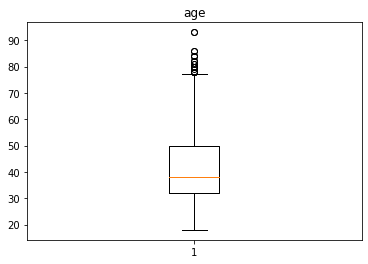

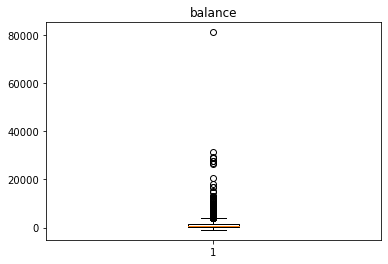

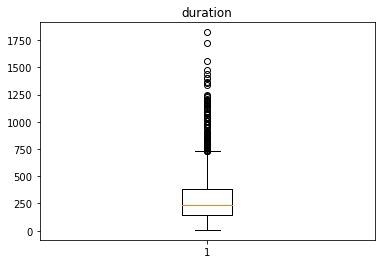

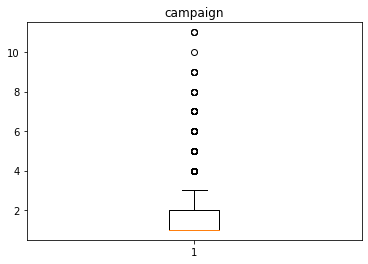

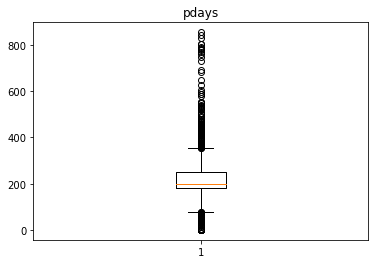

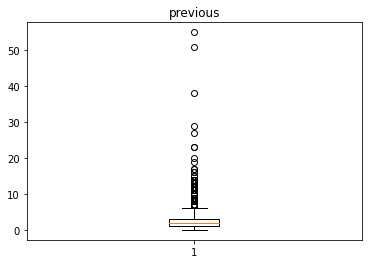

In [29]:
features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
data = df[features]

# Create a box plot for each numerical feature
for feature in data.columns:
    plt.figure()
    plt.boxplot(data[feature])
    plt.title(feature)
    plt.show()

`age`, `balance`, `duration`, `campaign`, `pdays`, `previous` have outliers. So, we apply `RobustScaler` which transforms each value in a column by subtracting the median from it and then dividing by the interquartile range.

In [30]:
robust_scaler = RobustScaler()
df[['age',
    'balance',
    'duration',
    'campaign',
    'pdays',
    'previous']] = robust_scaler.fit_transform(df[['age',
                                                     'balance',
                                                     'duration',
                                                     'campaign',
                                                     'pdays',
                                                     'previous']])

In [31]:
df.tail()

age  education   balance  day  duration  campaign  pdays  previous  \
1995 -1.000000          0  1.548164   16  0.390558       1.0    0.0      -1.0   
1996 -0.555556          2 -0.293832   16  4.712446       1.0    0.0      -1.0   
1997  2.388889          1  0.417879   17 -0.021459       0.0    0.0      -1.0   
1998  0.444444          1  2.627859   20 -0.218884       0.0    0.0      -1.0   
1999  0.111111          2  4.055440   22 -0.120172       1.0    0.0      -1.0   

      month_sin     month_cos  job_blue-collar  job_entrepreneur  \
1995       -1.0 -1.836970e-16                0                 0   
1996       -1.0 -1.836970e-16                0                 0   
1997       -1.0 -1.836970e-16                0                 0   
1998       -1.0 -1.836970e-16                0                 0   
1999       -1.0 -1.836970e-16                0                 1   

      job_housemaid  job_management  job_retired  job_self-employed  \
1995              0               0            0                  0   
1996              0               0            0                  0   
1997              0               0            1                  0   
1998              0               0            0                  0   
1999              0               0            0                  0   

      job_services  job_student  job_technician  job_unemployed  job_nan  \
1995             0            1               0               0        0   
1996             0            0               0               0        0   
1997             0            0               0               0        0   
1998             1            0               0               0        0   
1999             0            0               0               0        0   

      contact_telephone  contact_nan  poutcome_other  poutcome_success  \
1995                  0            0               0                 0   
1996                  0            0               0                 0   
1997                  1            0               0                 0   
1998                  0            1               0                 0   
1999                  0            0               0                 0   

      poutcome_nan  marital_married  marital_single  default_yes  housing_yes  \
1995             1                0               1            0            0   
1996             1                0               1            0            0   
1997             1                1               0            0            0   
1998             1                1               0            0            1   
1999             1                1               0            0            0   

      loan_yes  subscribed_yes  
1995         0               1  
1996         0               1  
1997         0               1  
1998         0               1  
1999         0               1

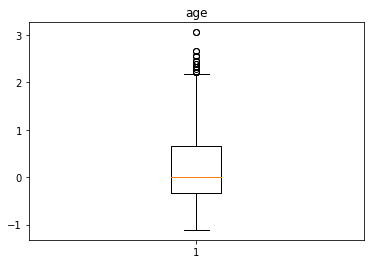

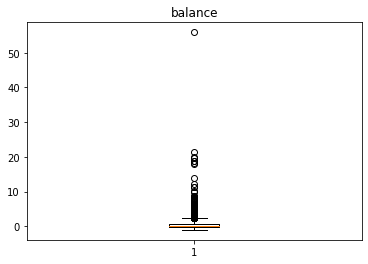

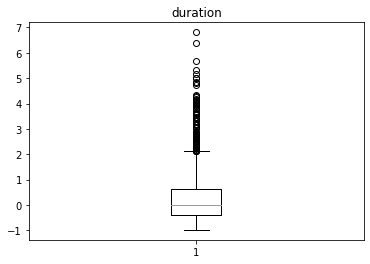

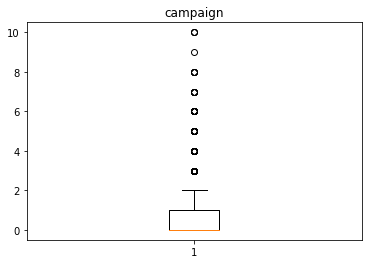

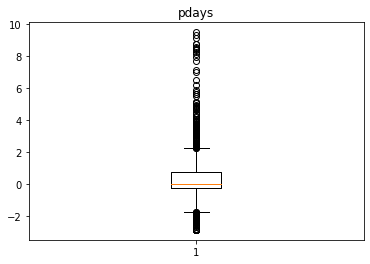

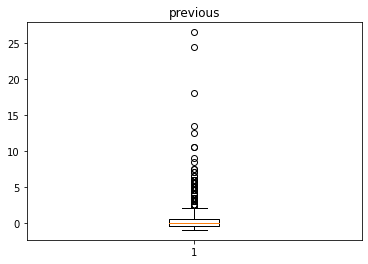

In [32]:
features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
data = df[features]

# Create a box plot for each numerical feature
for feature in data.columns:
    plt.figure()
    plt.boxplot(data[feature])
    plt.title(feature)
    plt.show()

#### Rescale ordinal features
`day` attribute only have values within a given range [1, 31]. This attribute can be scaled using MinMaxScaler as the range is small and it has no outlier. MinMaxScaler transform features by scaling each feature to a given range.

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))

df['day'] = scaler.fit_transform(df[['day']])
df.tail()

age  education   balance       day  duration  campaign  pdays  \
1995 -1.000000          0  1.548164  0.500000  0.390558       1.0    0.0   
1996 -0.555556          2 -0.293832  0.500000  4.712446       1.0    0.0   
1997  2.388889          1  0.417879  0.533333 -0.021459       0.0    0.0   
1998  0.444444          1  2.627859  0.633333 -0.218884       0.0    0.0   
1999  0.111111          2  4.055440  0.700000 -0.120172       1.0    0.0   

      previous  month_sin     month_cos  job_blue-collar  job_entrepreneur  \
1995      -1.0       -1.0 -1.836970e-16                0                 0   
1996      -1.0       -1.0 -1.836970e-16                0                 0   
1997      -1.0       -1.0 -1.836970e-16                0                 0   
1998      -1.0       -1.0 -1.836970e-16                0                 0   
1999      -1.0       -1.0 -1.836970e-16                0                 1   

      job_housemaid  job_management  job_retired  job_self-employed  \
1995              0               0            0                  0   
1996              0               0            0                  0   
1997              0               0            1                  0   
1998              0               0            0                  0   
1999              0               0            0                  0   

      job_services  job_student  job_technician  job_unemployed  job_nan  \
1995             0            1               0               0        0   
1996             0            0               0               0        0   
1997             0            0               0               0        0   
1998             1            0               0               0        0   
1999             0            0               0               0        0   

      contact_telephone  contact_nan  poutcome_other  poutcome_success  \
1995                  0            0               0                 0   
1996                  0            0               0                 0   
1997                  1            0               0                 0   
1998                  0            1               0                 0   
1999                  0            0               0                 0   

      poutcome_nan  marital_married  marital_single  default_yes  housing_yes  \
1995             1                0               1            0            0   
1996             1                0               1            0            0   
1997             1                1               0            0            0   
1998             1                1               0            0            1   
1999             1                1               0            0            0   

      loan_yes  subscribed_yes  
1995         0               1  
1996         0               1  
1997         0               1  
1998         0               1  
1999         0               1

To bring column `education` to the interval $[0,1]$ we can simply divide it by 3, as it is an ordinal columns with four possible values: 0, 1, 2 and 3.

In [34]:
df['education'] = df['education']/3
df.tail()

age  education   balance       day  duration  campaign  pdays  \
1995 -1.000000   0.000000  1.548164  0.500000  0.390558       1.0    0.0   
1996 -0.555556   0.666667 -0.293832  0.500000  4.712446       1.0    0.0   
1997  2.388889   0.333333  0.417879  0.533333 -0.021459       0.0    0.0   
1998  0.444444   0.333333  2.627859  0.633333 -0.218884       0.0    0.0   
1999  0.111111   0.666667  4.055440  0.700000 -0.120172       1.0    0.0   

      previous  month_sin     month_cos  job_blue-collar  job_entrepreneur  \
1995      -1.0       -1.0 -1.836970e-16                0                 0   
1996      -1.0       -1.0 -1.836970e-16                0                 0   
1997      -1.0       -1.0 -1.836970e-16                0                 0   
1998      -1.0       -1.0 -1.836970e-16                0                 0   
1999      -1.0       -1.0 -1.836970e-16                0                 1   

      job_housemaid  job_management  job_retired  job_self-employed  \
1995              0               0            0                  0   
1996              0               0            0                  0   
1997              0               0            1                  0   
1998              0               0            0                  0   
1999              0               0            0                  0   

      job_services  job_student  job_technician  job_unemployed  job_nan  \
1995             0            1               0               0        0   
1996             0            0               0               0        0   
1997             0            0               0               0        0   
1998             1            0               0               0        0   
1999             0            0               0               0        0   

      contact_telephone  contact_nan  poutcome_other  poutcome_success  \
1995                  0            0               0                 0   
1996                  0            0               0                 0   
1997                  1            0               0                 0   
1998                  0            1               0                 0   
1999                  0            0               0                 0   

      poutcome_nan  marital_married  marital_single  default_yes  housing_yes  \
1995             1                0               1            0            0   
1996             1                0               1            0            0   
1997             1                1               0            0            0   
1998             1                1               0            0            1   
1999             1                1               0            0            0   

      loan_yes  subscribed_yes  
1995         0               1  
1996         0               1  
1997         0               1  
1998         0               1  
1999         0               1

 All other attributes are binary after encoding performed, so no rescaling required.

## Treatment of Outliers

`age`, `balance`,  `duration`,  `campaign`,  `pdays` and `previous` attributes contain outliers as seen in the boxplot. Since the outlier values are practically possible in all the above features, instead of ignoring the data rows with extreme values we can transform them to diminish the negative impact of outliers to ML models. A typical way to do this is to apply a log transformation.

Also, `balance` contains a outlier value which is too big than other outliers (boxplot of balance). Therefore, it is better to truncate `balance` to 99 percentile and apply log transform.

Let's also take a look at their histograms after we have rescaled them.

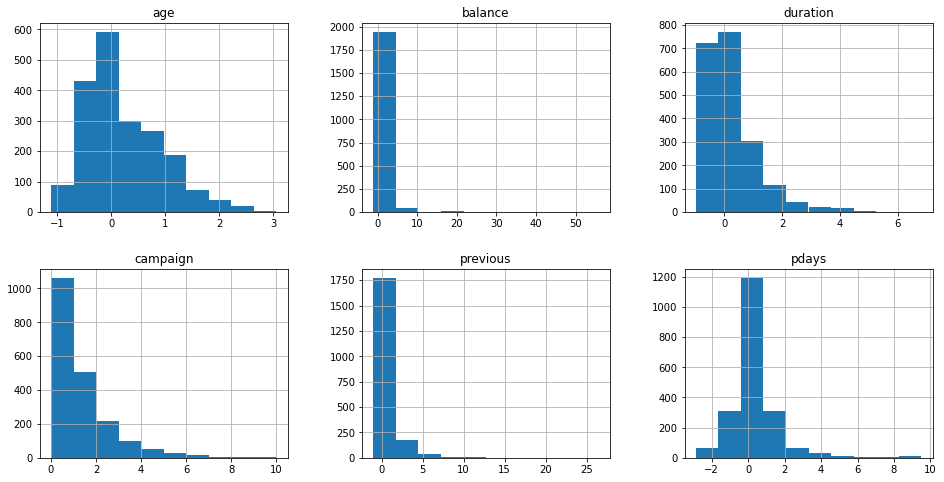

In [35]:
df[['age', 'balance', 'duration', 'campaign', 'previous', 'pdays']].hist(figsize=(16,8), layout=(2,3))
plt.show()

All histogram are skewed to the left, which is not ideal. Many ML algorithms work best when the features are not skewed to either side.

Finally, before treating the outliers, let's find the minimum values in these columns.

In [36]:
df[['age', 'balance', 'duration', 'campaign', 'previous', 'pdays']].min()

age        -1.111111
balance    -1.060984
duration   -0.982833
campaign    0.000000
previous   -1.000000
pdays      -2.869565
dtype: float64

We have negative values in both columns after rescaling and we need to add a constant to all values in order to shift them to a positive range before applying a log transformation. 
Here I chose to shift the values to the interval $[1, +\infty]$ before applying a log transformation.

In [37]:
# Truncate the balance feature at the 99th percentile
df['balance'] = df['balance'].clip(upper=np.percentile(df['balance'], 99))

# Use a log transformation to decrease the impact of outliers
df['age'] = np.log(df['age'] + abs(df['age'].min()) + 1.1)
df['balance'] = np.log(df['balance'] + abs(df['balance'].min()) + 1.1)
df['duration'] = np.log(df['duration'] + abs(df['duration'].min()) + 1.1)
df['campaign'] = np.log(df['campaign'] + abs(df['campaign'].min()) + 1.1)
df['pdays'] = np.log(df['pdays'] + abs(df['pdays'].min()) + 1.1)
df['previous'] = np.log(df['previous'] + abs(df['previous'].min()) + 1.1)

Let's plot again.

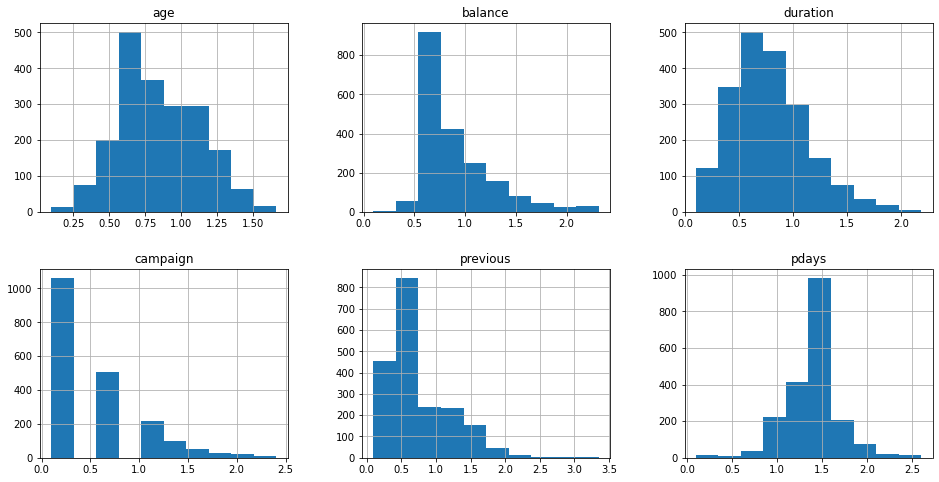

In [38]:
df[['age', 'balance', 'duration', 'campaign', 'previous', 'pdays']].hist(figsize=(16,8), layout=(2,3))
plt.show()

The histograms show that the transformed features are less skewed and have distributions closer to normal than the original features

## F. Creation of Derived Features

We can create a combined feature derived of `age` and `balance`. This can be used to capture the relationship between two attributes leading to serve like an indicator of financial stability. Also as `age` and `balance` are rescaled, we do not need to scale derived attribute `balance_per_age` as it is the ratio of these attributes. So it is scaled similar way.

In [39]:
df['balance_per_age'] = df['balance'] / df['age']

# Rescale the balance_per_age feature using MinMaxScaler
minmax_scaler = MinMaxScaler()
df['balance_per_age'] = minmax_scaler.fit_transform(df[['balance_per_age']])

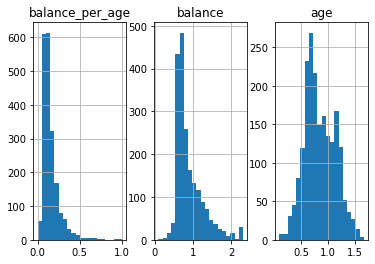

In [40]:
df[['balance_per_age', 'balance', 'age']].hist(bins=20, layout=(1,3))
plt.show()

Visual inspection of above histogram shows the derived attribute has similar scale of `balance` and `age` which are scaled using `RobustScaler`.

In [41]:
df.tail()

age  education   balance       day  duration  campaign     pdays  \
1995  0.191538   0.000000  1.310802  0.500000  0.905590  0.741937  1.378657   
1996  0.504137   0.666667  0.624414  0.500000  1.916228  0.741937  1.378657   
1997  1.526056   0.333333  0.947349  0.533333  0.723372  0.095310  1.378657   
1998  0.976654   0.333333  1.566289  0.633333  0.622697  0.095310  1.378657   
1999  0.842525   0.666667  1.827195  0.700000  0.674301  0.741937  1.378657   

      previous  month_sin     month_cos  job_blue-collar  job_entrepreneur  \
1995   0.09531       -1.0 -1.836970e-16                0                 0   
1996   0.09531       -1.0 -1.836970e-16                0                 0   
1997   0.09531       -1.0 -1.836970e-16                0                 0   
1998   0.09531       -1.0 -1.836970e-16                0                 0   
1999   0.09531       -1.0 -1.836970e-16                0                 1   

      job_housemaid  job_management  job_retired  job_self-employed  \
1995              0               0            0                  0   
1996              0               0            0                  0   
1997              0               0            1                  0   
1998              0               0            0                  0   
1999              0               0            0                  0   

      job_services  job_student  job_technician  job_unemployed  job_nan  \
1995             0            1               0               0        0   
1996             0            0               0               0        0   
1997             0            0               0               0        0   
1998             1            0               0               0        0   
1999             0            0               0               0        0   

      contact_telephone  contact_nan  poutcome_other  poutcome_success  \
1995                  0            0               0                 0   
1996                  0            0               0                 0   
1997                  1            0               0                 0   
1998                  0            1               0                 0   
1999                  0            0               0                 0   

      poutcome_nan  marital_married  marital_single  default_yes  housing_yes  \
1995             1                0               1            0            0   
1996             1                0               1            0            0   
1997             1                1               0            0            0   
1998             1                1               0            0            1   
1999             1                1               0            0            0   

      loan_yes  subscribed_yes  balance_per_age  
1995         0               1         0.926333  
1996         0               1         0.154517  
1997         0               1         0.069445  
1998         0               1         0.204799  
1999         0               1         0.282598

# G. Save the Prepared Dataset

Finally, let's save the prepared dataset as a CSV file.

In [42]:
df.to_csv('bank_train_prepared.csv')